In [177]:
def increment(f, x, y, tau):
    k0 = tau * f(x,y)
    k1 = tau * f(x + tau/2., y + k0/2.)
    k2 = tau * f(x + tau/2., y + k1/2.)
    k3 = tau * f(x + tau, y + k2)
    return (k0 + k1*2. + k2*2. + k3) / 6

In [178]:
import numpy as np
def rungeKutta(f, x0, y0, tEnd, tau):
    x = []
    y = []
    x.append(x0)
    y.append(y0)
    while x0 < tEnd:
        tau = min(tau, tEnd - x0)
        y0 = y0 + increment(f, x0, y0, tau)
        x0 = x0 + tau
        x.append(x0)
        y.append(y0)
    return np.array(x), np.array(y)

In [179]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

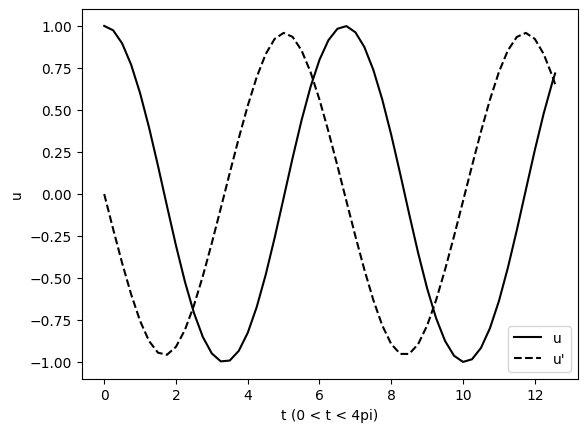

In [180]:
def f(x, y):
    f = np.zeros((2), "float")
    f[0] = y[1]
    f[1] = -math.sin(y[0])
    return f
y0 = [1., 0.,]
t0 = 0
tEnd = 4*np.pi
tau = 0.25
x, y = rungeKutta(f, t0, y0, tEnd, tau)
plt.plot(x, y[:, 0], color='black', label='u')
plt.plot(x, y[:, 1], color='black', ls='--', label='u\'')
plt.xlabel("t (0 < t < 4pi)")
plt.ylabel("u")
plt.legend()
plt.show()

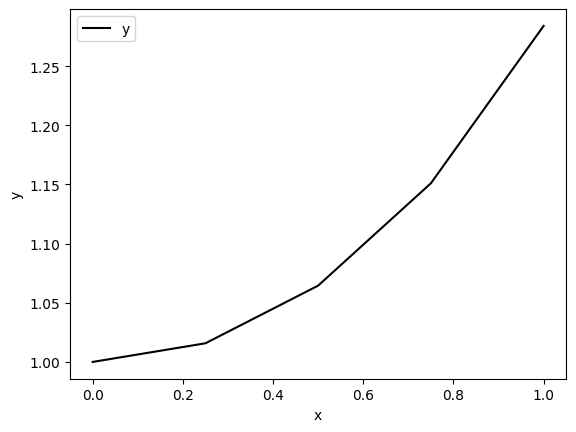

In [181]:
def f(x, y):
    return x*y/2
x0 = 0
xEnd = 1
y0 = 1
tau = 0.25
x, y = rungeKutta(f, x0, y0, xEnd, tau)
plt.plot(x, y, color='black', label='y')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

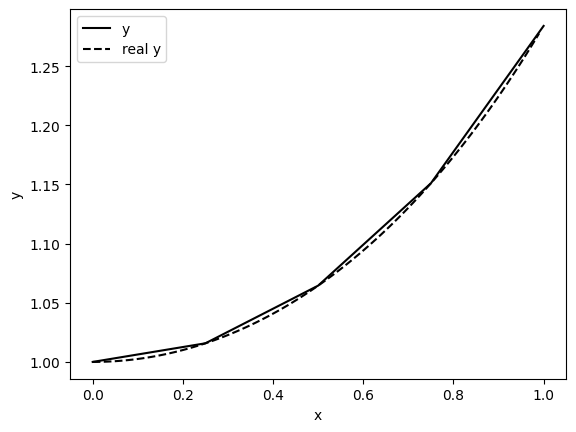

In [182]:
def f(x):
    return math.exp((x**2)/4)
plt.plot(x, y, color='black', label='y')
X = np.arange(0, 1, 0.01)
plt.plot(X, tuple(map(f, X)), color='black', ls='--', label='real y')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

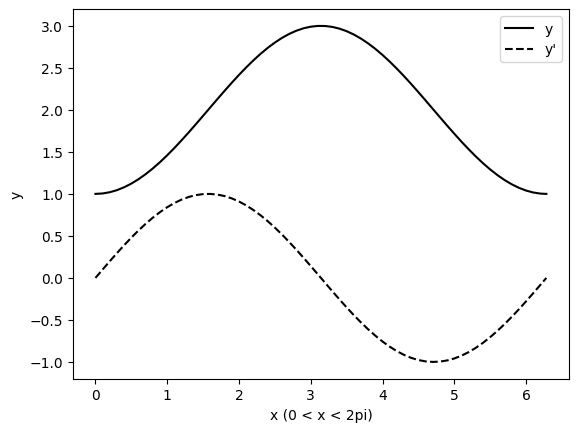

In [183]:
def f(x,y):
    f = np.zeros((2), 'float')
    f[0] = y[1]
    f[1] = math.cos(x)
    return f
x0 = 0
xEnd = 2*np.pi
y0 = [1., 0.]
tau = 0.1
x, y = rungeKutta(f, x0, y0, xEnd, tau)
plt.plot(x, y[:, 0], color='black', label='y')
plt.plot(x, y[:, 1], color='black', ls='--', label='y\'')
plt.xlabel("x (0 < x < 2pi)")
plt.ylabel("y")
plt.legend()
plt.show()

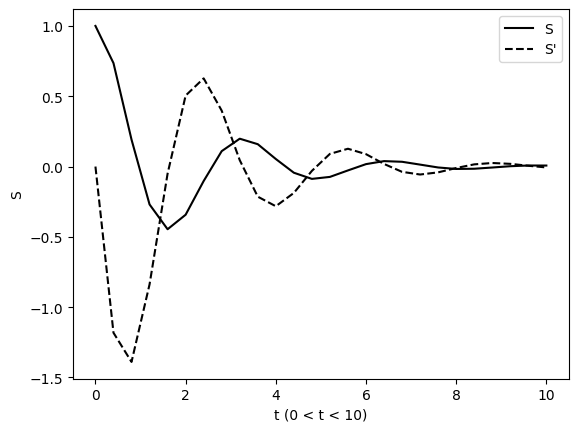

In [194]:
def f(x, y):
    delta = 0.5
    omega = 2
    f = np.zeros((2), 'float')
    f[0] = y[1]
    f[1] = -2*delta*f[0] - omega**2*y[0]
    return f

x0 = 0
xEnd = 10
y0 = [1., 0.]
tau = 0.4
x, y = rungeKutta(f, x0, y0, xEnd, tau)
plt.plot(x, y[:, 0], color='black', label='S')
plt.plot(x, y[:, 1], color='black', ls='--', label='S\'')
plt.xlabel("t (0 < t < 10)")
plt.ylabel("S")
plt.legend()
plt.show()


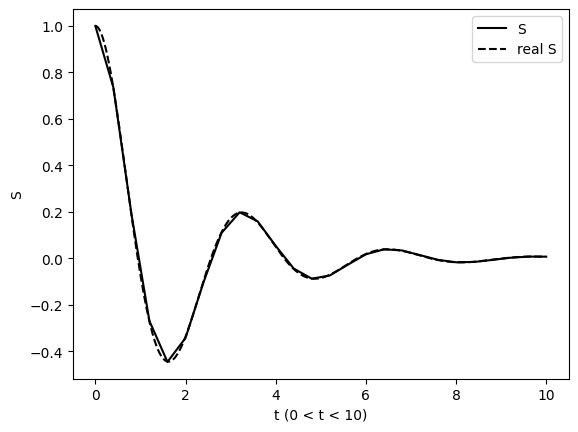

In [195]:
def S(x):
    return (1/15)*math.exp(-x/2)*(math.sqrt(15)*math.sin(math.sqrt(15)*x/2)+
                                15*math.cos(math.sqrt(15)*x/2))
plt.plot(x, y[:, 0], color='black', label='S')
X = np.arange(0, 10, 0.01)
Y = tuple(map(S, X))
plt.plot(X, Y, color="black", ls='--', label='real S')
plt.xlabel("t (0 < t < 10)")
plt.ylabel("S")
plt.legend()
plt.show()